In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 7) # -4 ... 10 
print('SD:', SD)

SD: 0.010485760000000004


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'AMZN', 'ANET', 'APPH', 'ATVI', 'AXON', 
    'AYX', 'BILI', 'BROS', 'BYND', 'COUR','CPNG', 'DDOG', 'DOCU', 
    'DUOL', 'EDIT', 'ETSY', 'FSLY', 'FUV', 'GH', 'GMED', 'GOOG', 'INTG', 
    'ISRG', 'JD', 'LULU', 'LUV', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH', 
    'NVCR', 'OKTA', 'PANW', 'PINS', 'PTON', 'QDEL', 'RDFN', 'RGEN', 
    'ROKU', 'SE', 'SHOP', 'SPLK', 'TDOC', 'TEAM', 'TREX', 'TSLA', 'TTD', 
    'TTWO', 'TWLO', 'TWTR', 'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

59

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = (datetime.now() + timedelta(1)).date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 9, 17))

In [6]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['TREX',
 'TSLA',
 'TTD',
 'TTWO',
 'TWLO',
 'TWTR',
 'UPST',
 'VEEV',
 'ZEN',
 'ZG',
 'ZNGA',
 '^IXIC']

In [7]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  12 of 12 completed
Generating derived columns...
   ...TREX
   ...TSLA
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...ZEN
   ...ZG
   ...ZNGA
   ...^IXIC


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 TREX
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 27.062284632286474
Refitting current best...
Current best ma returns: 29.477092171274663
Fraction Invested: 0.6783936758855537
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 29.350487333376506
Invested: 0.6783936758855537
New best: 29.408895683820937
Invested: 0.6783936758855537
New best: 29.864288068589318
Invested: 0.6783936758855537
New best: 29.92686269031313
Invested: 0.6783936758855537
New best: 30.008665577384576
Invested: 0.6783936758855537
New best: 30.051999282959702
Invested: 0.6783936758855537
New best: 30.05403966232393
Invested: 0.6783936758855537
New best: 30.278519632827834
Invested: 0.6822543869407118
Round: 15


Beginning ew_ma method...
-------

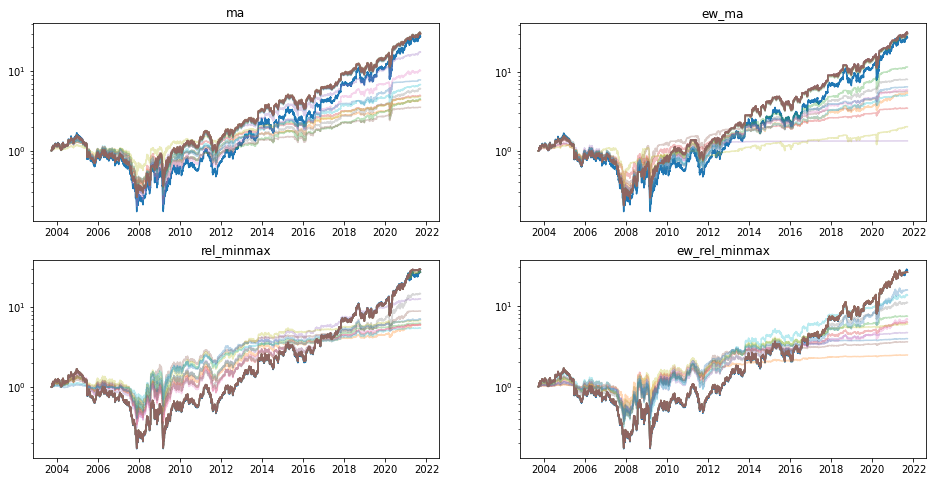

Saving TREX params...



----------------------------------------------------------------------
                                 TSLA
----------------------------------------------------------------------
No saved data. Initialized as None


Beginning ma method...
--------------------------------------------------
Do nothing returns: 125.88774043285916
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 125.88774043285916
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 125.88774043285916
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_rel_minmax method...

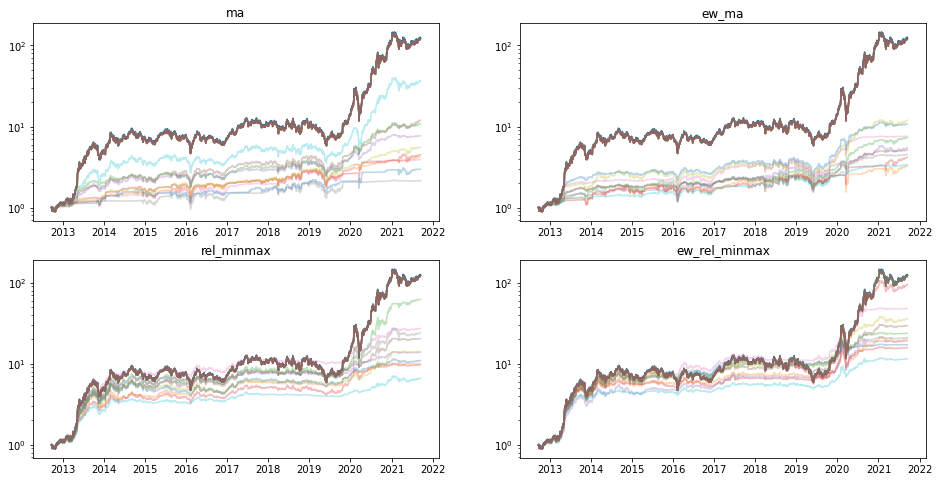

Saving TSLA params...



----------------------------------------------------------------------
                                 TTD
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 11.840829347465764
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 102
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 11.840829347465764
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 11.840829347465764
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 102
Beginning adjusted search...
Round: 15


Beginning ew_rel_minmax method...
------------

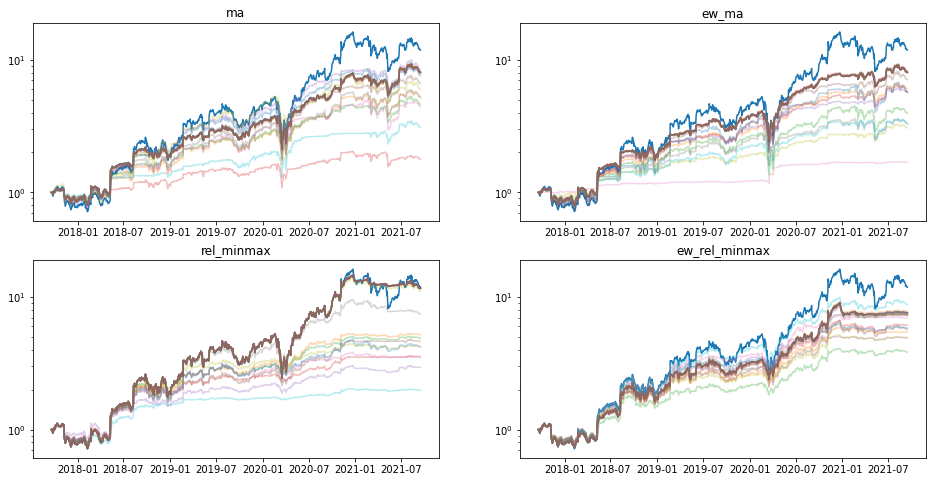

Saving TTD params...



----------------------------------------------------------------------
                                 TTWO
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 11.510006793551518
Refitting current best...
Current best ma returns: 13.435677843496514
Fraction Invested: 0.9977492500236123
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 13.43436803838762
Invested: 0.9977492500236123
New best: 13.445618285570713
Invested: 0.9977492500236123
New best: 13.44570179684455
Invested: 0.9977492500236123
New best: 13.44699122432102
Invested: 0.9977492500236123
New best: 13.447670441296268
Invested: 0.9977492500236123
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 11.510006793551518
Refitting current best...
Current best ew_ma returns: 13.48237607951846

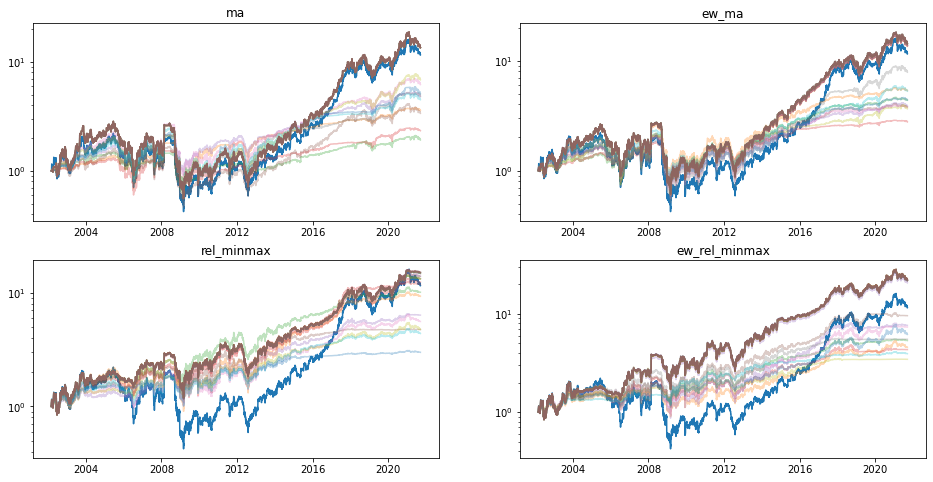

Saving TTWO params...



----------------------------------------------------------------------
                                 TWLO
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 11.665074780817537
Refitting current best...
Current best ma returns: 12.540089974509716
Fraction Invested: 0.9987440809069159
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 12.539397629675761
Invested: 0.9987440809069159
New best: 12.56082787010523
Invested: 0.9987440809069159
New best: 12.576359633047165
Invested: 0.9987440809069159
New best: 12.577636605069017
Invested: 0.9987440809069159



Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 11.665074780817537
Refitting current best...
Current best ew_ma returns: 16.478483119691237
Fraction Invested: 0.997944505201123
Beginning random search..

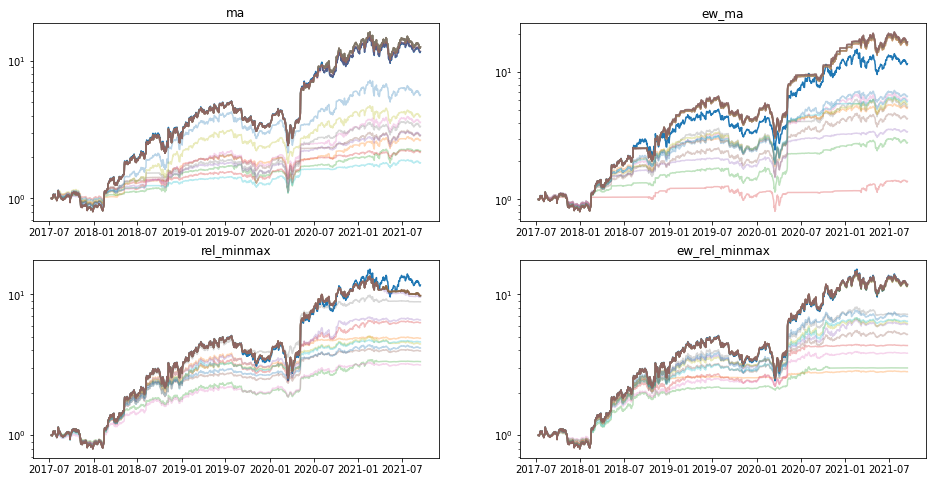

Saving TWLO params...



----------------------------------------------------------------------
                                 TWTR
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1.6713513554753483
Refitting current best...
Current best ma returns: 1.7980048421752397
Fraction Invested: 0.5654561583181302
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 1.7989915638099605
Invested: 0.5654561583181302
New best: 1.7992557461085483
Invested: 0.5654561583181302
New best: 1.8102162276281821
Invested: 0.5654561583181302
New best: 1.8116364191556844
Invested: 0.5654561583181302
New best: 1.8119650225714223
Invested: 0.5654561583181302
New best: 1.8122910607874967
Invested: 0.5654561583181302
New best: 1.8239032281846908
Invested: 0.5654561583181302
Round: 15


Beginning ew_ma method...
-----------------------------------------

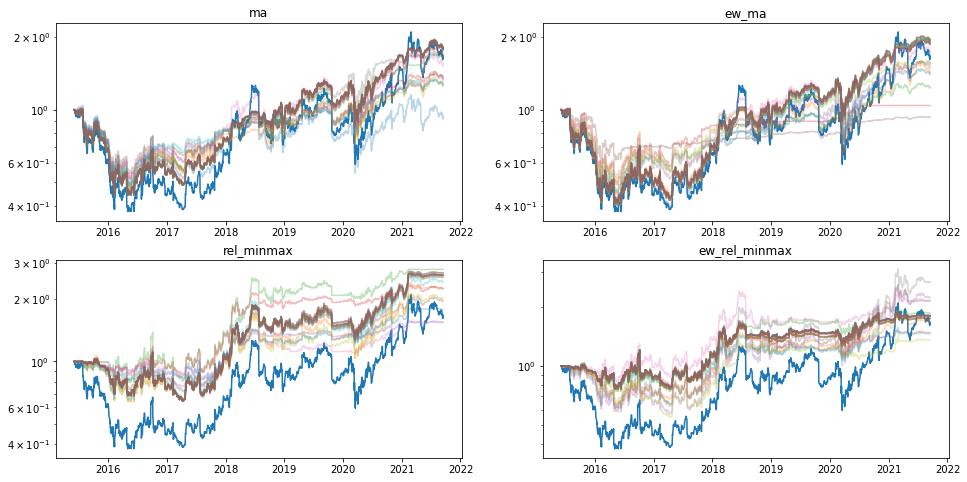

Saving TWTR params...



----------------------------------------------------------------------
                                 UPST
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 3.0655755001238183
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 108
Beginning adjusted search...
Round: 157 14


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 3.0655755001238183
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15 12


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 3.0655755001238183
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 108
Beginning adjusted search...
Round: 154 8 14


Beginning ew_rel_minmax method..

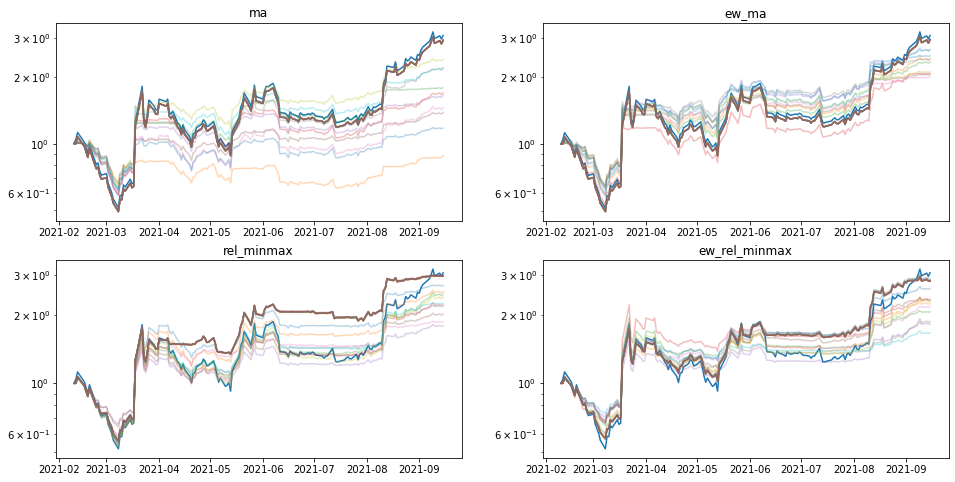

Saving UPST params...



----------------------------------------------------------------------
                                 VEEV
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 10.716481858877337
Refitting current best...
Current best ma returns: 10.829023661645225
Fraction Invested: 0.9999860481621369
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 10.829005099087588
Invested: 0.9999860481621369
New best: 10.83127366353423
Invested: 0.9999860481621369
New best: 10.851248370561795
Invested: 0.9999860481621369
New best: 10.896556244929764
Invested: 0.9999860481621369
New best: 10.902461420533166
Invested: 0.9999860481621369
New best: 10.91053341342796
Invested: 0.9999860481621369
New best: 10.915632625950401
Invested: 0.9999860481621369
New best: 11.098457714474785
Invested: 0.9999860481621369



Beginning ew_ma meth

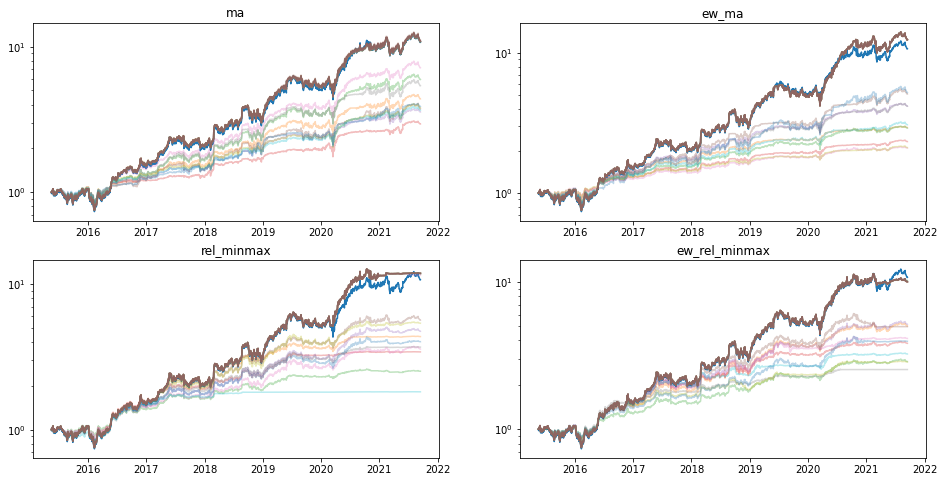

Saving VEEV params...



----------------------------------------------------------------------
                                 ZEN
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 6.064115161382828
Refitting current best...
Current best ma returns: 6.188135036262291
Fraction Invested: 0.999132860838472
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 6.188304309549116
Invested: 0.999132860838472
New best: 6.221339972258646
Invested: 0.999132860838472
New best: 6.224191540101867
Invested: 0.9998473512641614
New best: 6.22481569293605
Invested: 0.9998473512641614
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 6.064115161382828
Refitting current best...
Current best ew_ma returns: 7.101311501019355
Fraction Invested: 0.996843900114409
Beginning random search...
R

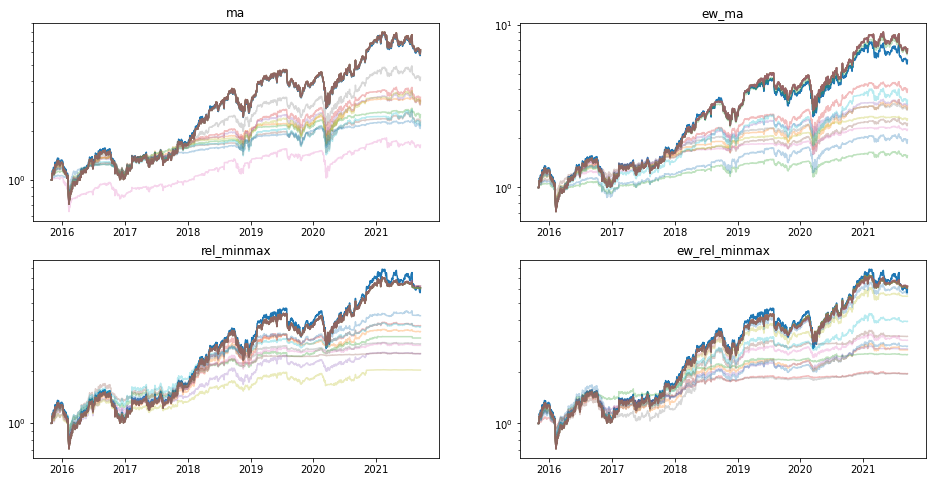

Saving ZEN params...



----------------------------------------------------------------------
                                 ZG
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 3.4825988357545783
Refitting current best...
Current best ma returns: 3.725133818877707
Fraction Invested: 0.9996662396731983
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 3.756902613199363
Invested: 0.9996662396731983
New best: 3.7644789881008043
Invested: 0.9996662396731983
New best: 3.7677375294119178
Invested: 0.9996662396731983
New best: 3.7762267219619194
Invested: 0.9996662396731983
New best: 3.7764250799138326
Invested: 0.9996662396731983
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 3.4825988357545783
Refitting current best...
Current best ew_ma returns: 4.075649882221478


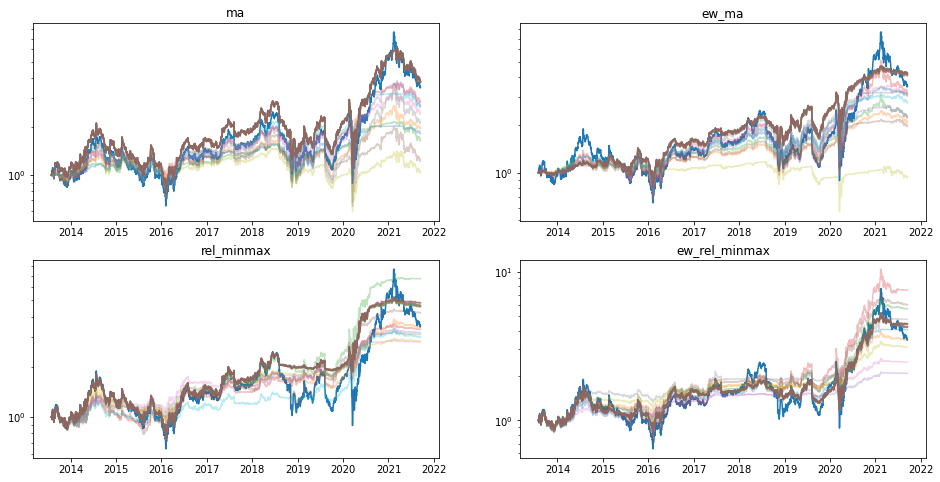

Saving ZG params...



----------------------------------------------------------------------
                                 ZNGA
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1.8505747970619377
Refitting current best...
Current best ma returns: 1.9172563356170533
Fraction Invested: 0.6217309014584556
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 1.930086843882989
Invested: 0.6217309014584556
New best: 1.9310191672029364
Invested: 0.6173106758120548
New best: 1.9310412482567592
Invested: 0.6173106758120548
New best: 1.9467469082730702
Invested: 0.6173106758120548
New best: 1.948372047001317
Invested: 0.6094247841634414
New best: 1.948793013881414
Invested: 0.6094247841634414
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 1.8505747970619377
Refitting curr

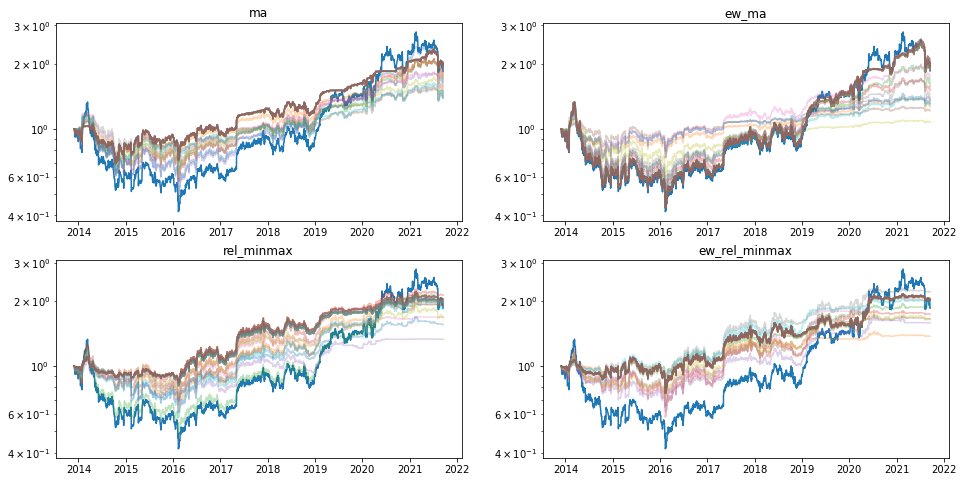

Saving ZNGA params...



----------------------------------------------------------------------
                                 ^IXIC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 36.150525736964234
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 36.168741566087455
Invested: 0.9720331582370679
New best: 36.214367160334234
Invested: 0.974904568444293
New best: 36.3104335880524
Invested: 0.974904568444293
New best: 36.45608123885952
Invested: 0.974904568444293
New best: 36.47689731264489
Invested: 0.974904568444293
New best: 36.53339395398892
Invested: 0.974904568444293
New best: 36.547175141911566
Invested: 0.974904568444293



Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 36.150525736964234
Refitting current best...
Curre

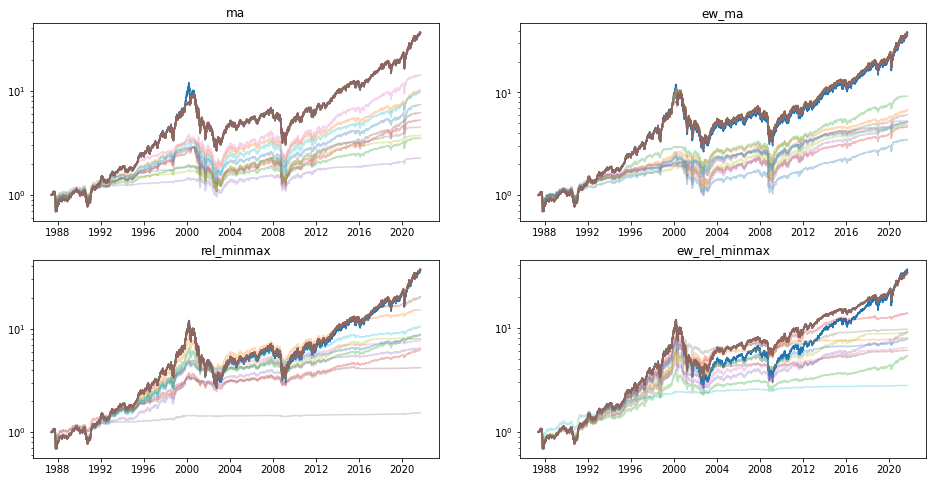

Saving ^IXIC params...


In [14]:
N_RAND = 10
N_ADJ = 15

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    try:
        best_params, best_returns = read_best_params(stock)
        stock_data = get_stock_data(stock, data)
        stock_data.fillna(method='ffill', inplace=True)
        stock_data.fillna(method='bfill', inplace=True)
        qp = QPercent(stock_data, 
                      N_CUTS, 
                      best_param_set=best_params, 
                      best_returns=best_returns, 
                      sd=SD)
        qp.run_sims(N_RAND, N_ADJ)
        best = get_best_param_set(qp)
        save_best_param_set(best, stock)
    except BaseException as e:
        print(f'Error encountered\n{e}')

In [15]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [16]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


TREX:
  Best Return: 31.078771603259742 (ew_ma)
  76.27% in

TSLA:
  Best Return: 125.88774043285916 (ma)
  100.00% in

TTD:
  Best Return: 11.840829347465764 (ma)
  100.00% in

TTWO:
  Best Return: 22.03364349902666 (ew_rel_minmax)
  30.04% in

TWLO:
  Best Return: 17.31019445119756 (ew_ma)
  99.79% in

TWTR:
  Best Return: 2.675035908596088 (rel_minmax)
  5.22% in

UPST:
  Best Return: 3.0655755001238183 (ma)
  100.00% in

VEEV:
  Best Return: 12.444251221462508 (ew_ma)
  99.94% in

ZEN:
  Best Return: 7.108436359147554 (ew_ma)
  99.68% in

ZG:
  Best Return: 4.867417814303419 (rel_minmax)
  7.89% in

ZNGA:
  Best Return: 2.0350700370784285 (rel_minmax)
  10.79% in

^IXIC:
  Best Return: 38.32052860478882 (ew_ma)
  96.16% in


In [17]:
!say qp is dunzo

IXIC: Nasdaq